In [3]:
import pylab as plt
import pandas as pd
import seaborn as sns
import json

# 知微事见数据

http://xgml.zhiweidata.net/?from=floating#/

In [90]:
j = json.load(open('zhiwei_line.json'))
df = pd.DataFrame(j)
df.tail()

,time,voice,heat,case,allCase
47,2020-02-15,,434828.9191,2009,68500
48,2020-02-16,,414931.4885,2048,70548
49,2020-02-17,,438663.6598,1886,72436
50,2020-02-18,,651786.8827,1749,74185
51,2020-02-19,,706464.2559,394,74576


In [94]:
df.to_excel('zhiwei_line_no_peak.xlsx')

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   time     52 non-null     object
 1   voice    52 non-null     object
 2   heat     52 non-null     object
 3   case     52 non-null     object
 4   allCase  52 non-null     object
dtypes: object(5)
memory usage: 2.2+ KB


In [93]:
df['time']

0     2019-12-30
1     2019-12-31
2     2020-01-01
3     2020-01-02
4     2020-01-03
5     2020-01-04
6     2020-01-05
7     2020-01-06
8     2020-01-07
9     2020-01-08
10    2020-01-09
11    2020-01-10
12    2020-01-11
13    2020-01-12
14    2020-01-13
15    2020-01-14
16    2020-01-15
17    2020-01-16
18    2020-01-17
19    2020-01-18
20    2020-01-19
21    2020-01-20
22    2020-01-21
23    2020-01-22
24    2020-01-23
25    2020-01-24
26    2020-01-25
27    2020-01-26
28    2020-01-27
29    2020-01-28
30    2020-01-29
31    2020-01-30
32    2020-01-31
33    2020-02-01
34    2020-02-02
35    2020-02-03
36    2020-02-04
37    2020-02-05
38    2020-02-06
39    2020-02-07
40    2020-02-08
41    2020-02-09
42    2020-02-10
43    2020-02-11
44    2020-02-12
45    2020-02-13
46    2020-02-14
47    2020-02-15
48    2020-02-16
49    2020-02-17
50    2020-02-18
51    2020-02-19
Name: time, dtype: object

In [89]:
df['heat'] = [float(i) for i in df['heat']]
df['case'] = [int(i) for i in df['case']]

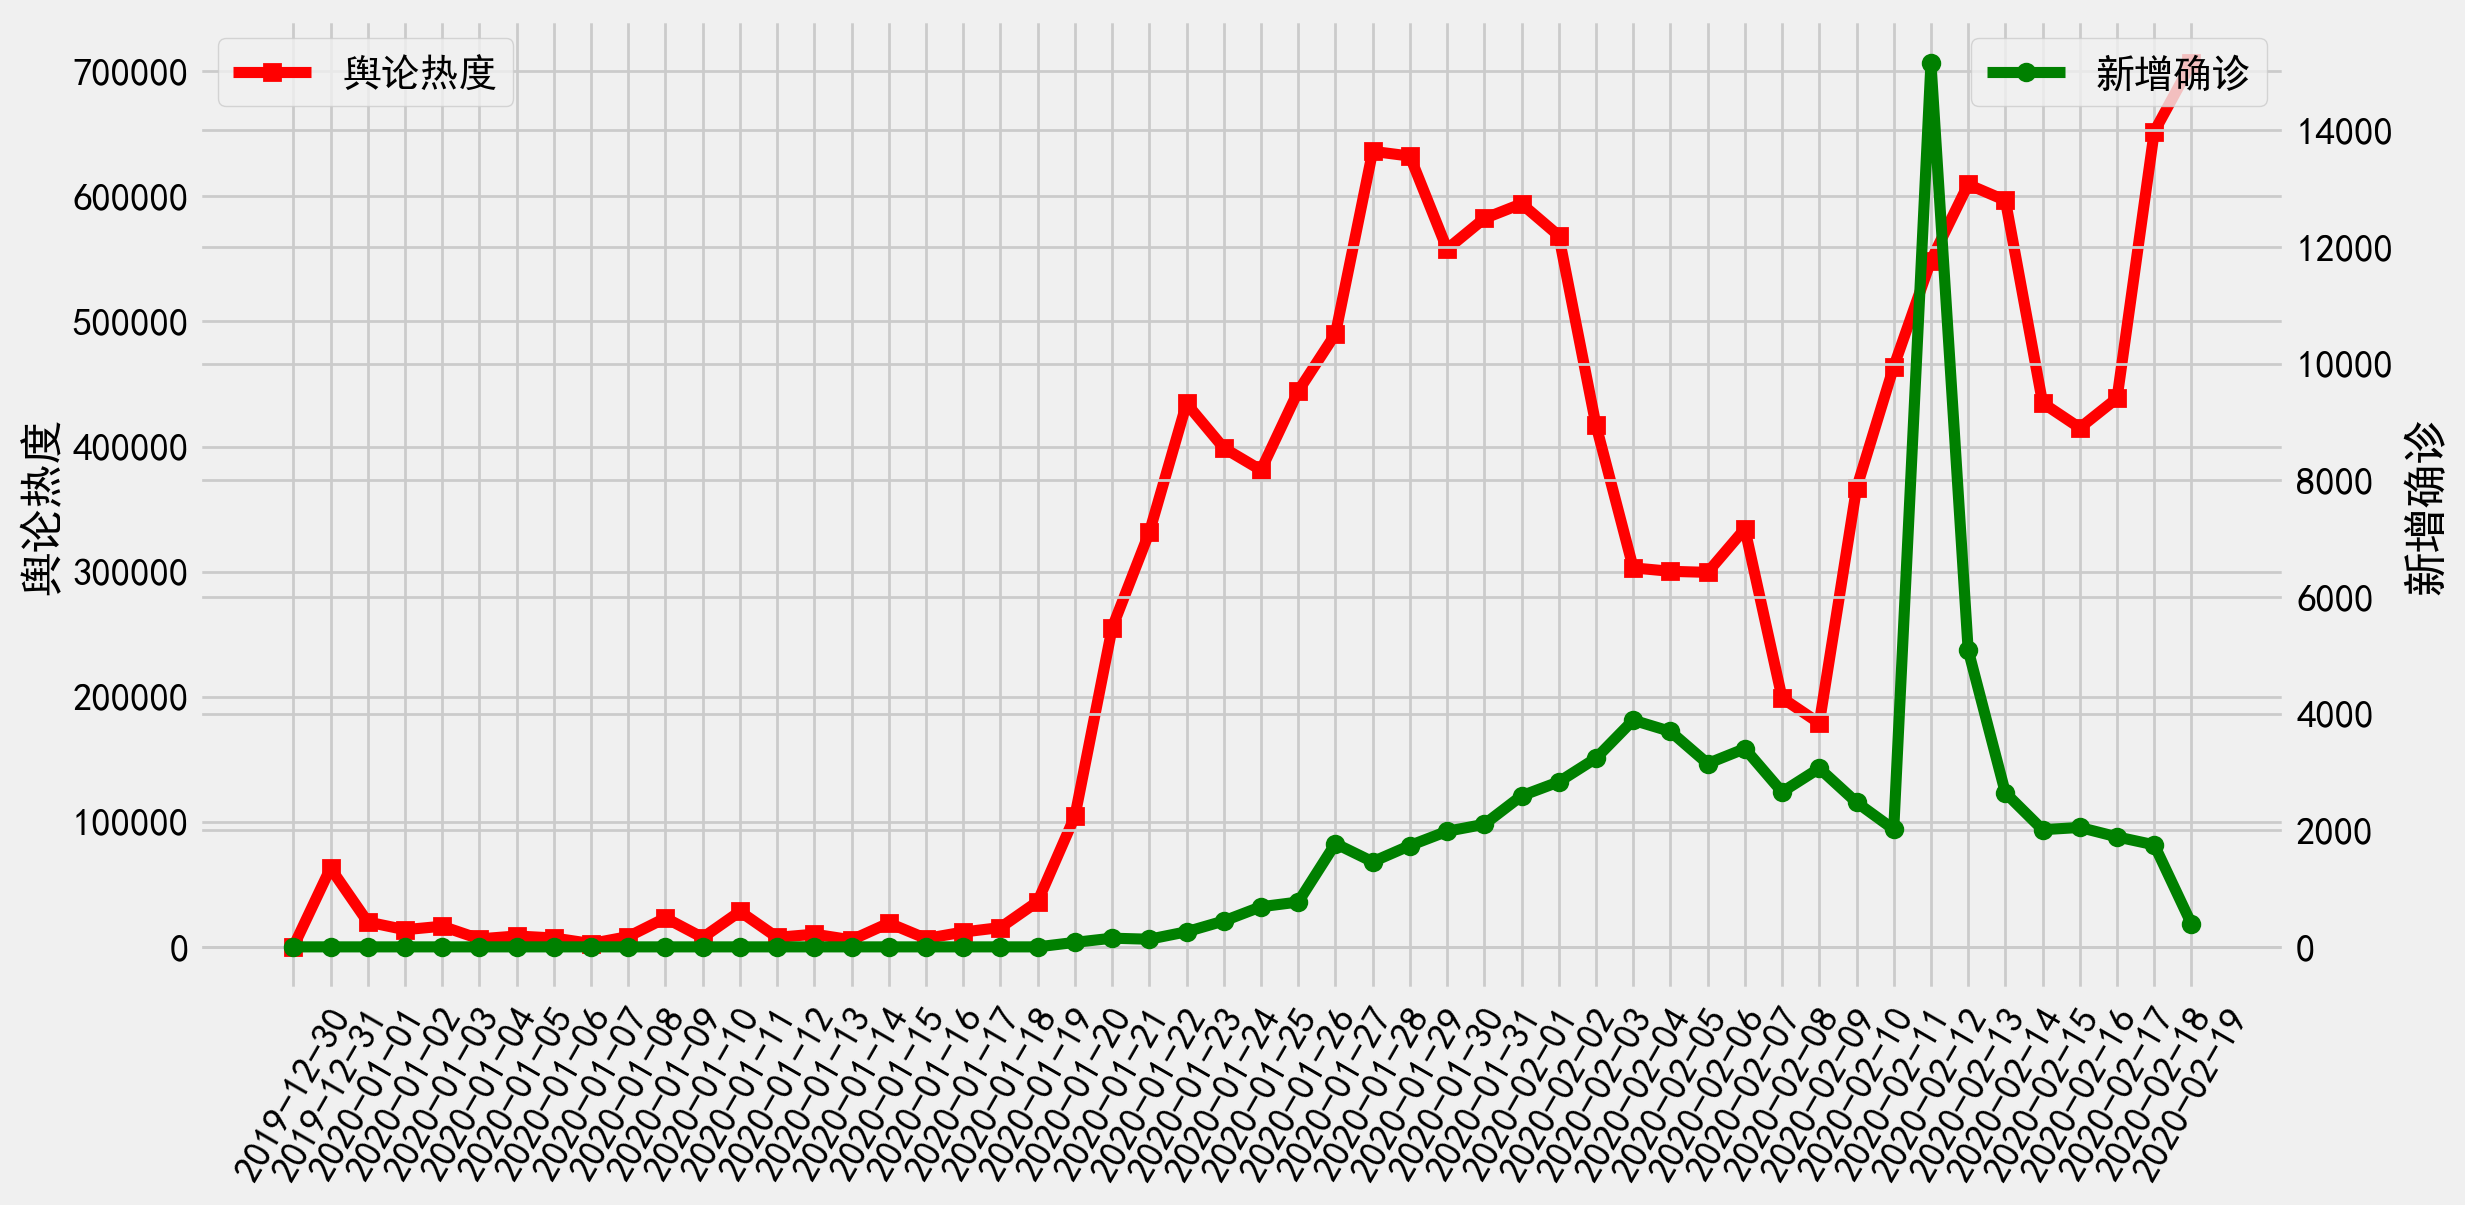

In [51]:
fig = plt.figure(figsize=(12,6),dpi = 200)
plt.style.use('fivethirtyeight')

ax1=fig.add_subplot(111)
ax1.plot(df['time'],  df['heat'], 'r-s')
ax1.set_ylabel('舆论热度', fontsize = 16)
ax1.tick_params(axis='x', rotation=60)
ax1.legend(('舆论热度',),loc='upper left')

ax2=ax1.twinx()
ax2.plot(df['time'], df['case'], 'g-o')
ax2.set_ylabel('新增确诊', fontsize = 16)
ax2.legend(('新增确诊',),loc='upper right')

plt.show()

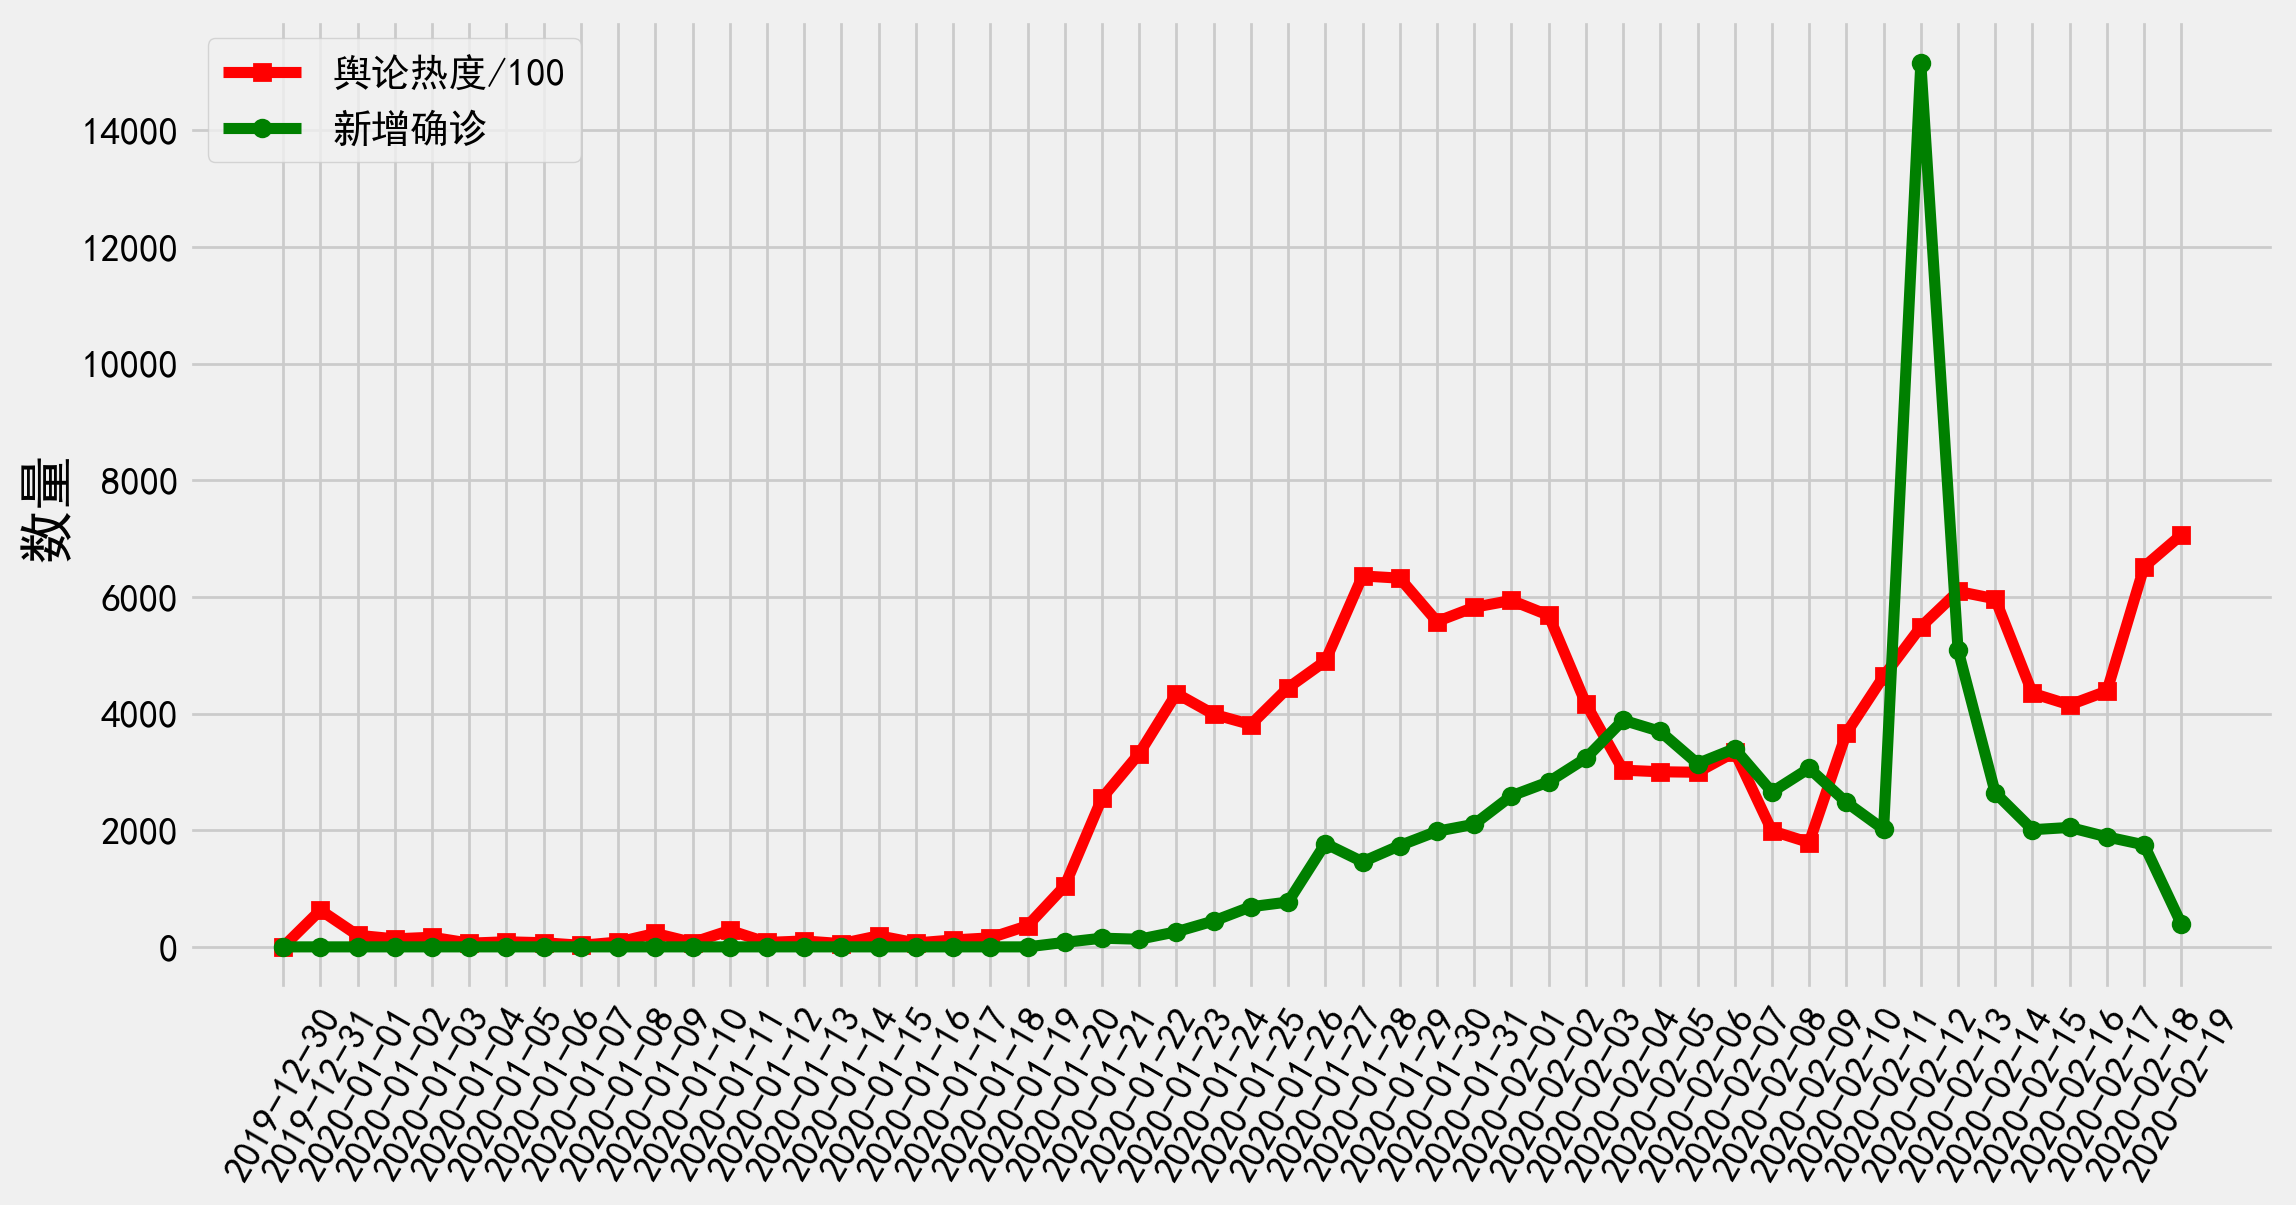

In [29]:
plt.figure(figsize=(12, 6), dpi = 200)
plt.style.use('fivethirtyeight')
plt.plot(df['time'], [float(i)/100 for i in df['heat']], 'r-s', label = '舆论热度/100')
plt.plot(df['time'], [int(i) for i in df['case']], 'g-o', label = '新增确诊')
plt.legend()
plt.xticks(rotation=60)
plt.ylabel('数量', fontsize = 20)
plt.show()

# 格兰杰因果检验

http://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.grangercausalitytests.html

In [79]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests
import numpy as np

help(df.pct_change)

Percentage change between the current and a prior element.
    
    Computes the percentage change from the immediately previous row by
    default. This is useful in comparing the percentage of change in a time
    series of elements.
    

## The Null hypothesis for grangercausalitytests 

> H0: the time series in the second column, x2, does NOT Granger cause the time series in the first column, x1. 

Grange causality means that past values of x2 have a statistically significant effect on the current value of x1, taking past values of x1 into account as regressors. We reject the null hypothesis that x2 does not Granger cause x1 if the pvalues are below a desired size of the test.

In [81]:
data = df[21:][['case','heat' ]].pct_change().dropna()

In [80]:
data.head()

,case,heat
22,0.935065,1.442401
23,-0.120805,0.299869
24,0.977099,0.310704
25,0.714286,-0.081957
26,0.549550,-0.044222


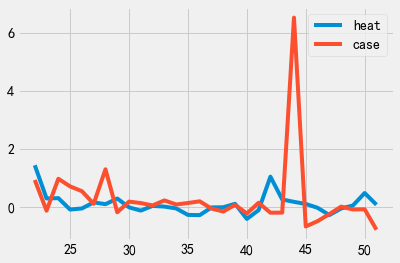

In [76]:
data.plot();

In [82]:
gc_res = grangercausalitytests(data,4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0800  , p=0.7796  , df_denom=26, df_num=1
ssr based chi2 test:   chi2=0.0892  , p=0.7652  , df=1
likelihood ratio test: chi2=0.0891  , p=0.7653  , df=1
parameter F test:         F=0.0800  , p=0.7796  , df_denom=26, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=7.5340  , p=0.0030  , df_denom=23, df_num=2
ssr based chi2 test:   chi2=18.3436 , p=0.0001  , df=2
likelihood ratio test: chi2=14.1086 , p=0.0009  , df=2
parameter F test:         F=7.5340  , p=0.0030  , df_denom=23, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=13.4029 , p=0.0001  , df_denom=20, df_num=3
ssr based chi2 test:   chi2=54.2818 , p=0.0000  , df=3
likelihood ratio test: chi2=29.7563 , p=0.0000  , df=3
parameter F test:         F=13.4029 , p=0.0001  , df_denom=20, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=8.8419  , p=0.0005  , df_d

# without peak

In [137]:
df = pd.read_excel('zhiwei_line_no_peak.xlsx')
df['heat'] = [float(i) for i in df['heat']]
df['case'] = [int(i) for i in df['case']]
df.tail()

,Unnamed: 0,time,voice,heat,case,allCase
47,47,2020-02-15,NaN,434828.9191,2009,68500
48,48,2020-02-16,NaN,414931.4885,2048,70548
49,49,2020-02-17,NaN,438663.6598,1886,72436
50,50,2020-02-18,NaN,651786.8827,1749,74185
51,51,2020-02-19,NaN,706464.2559,394,74576


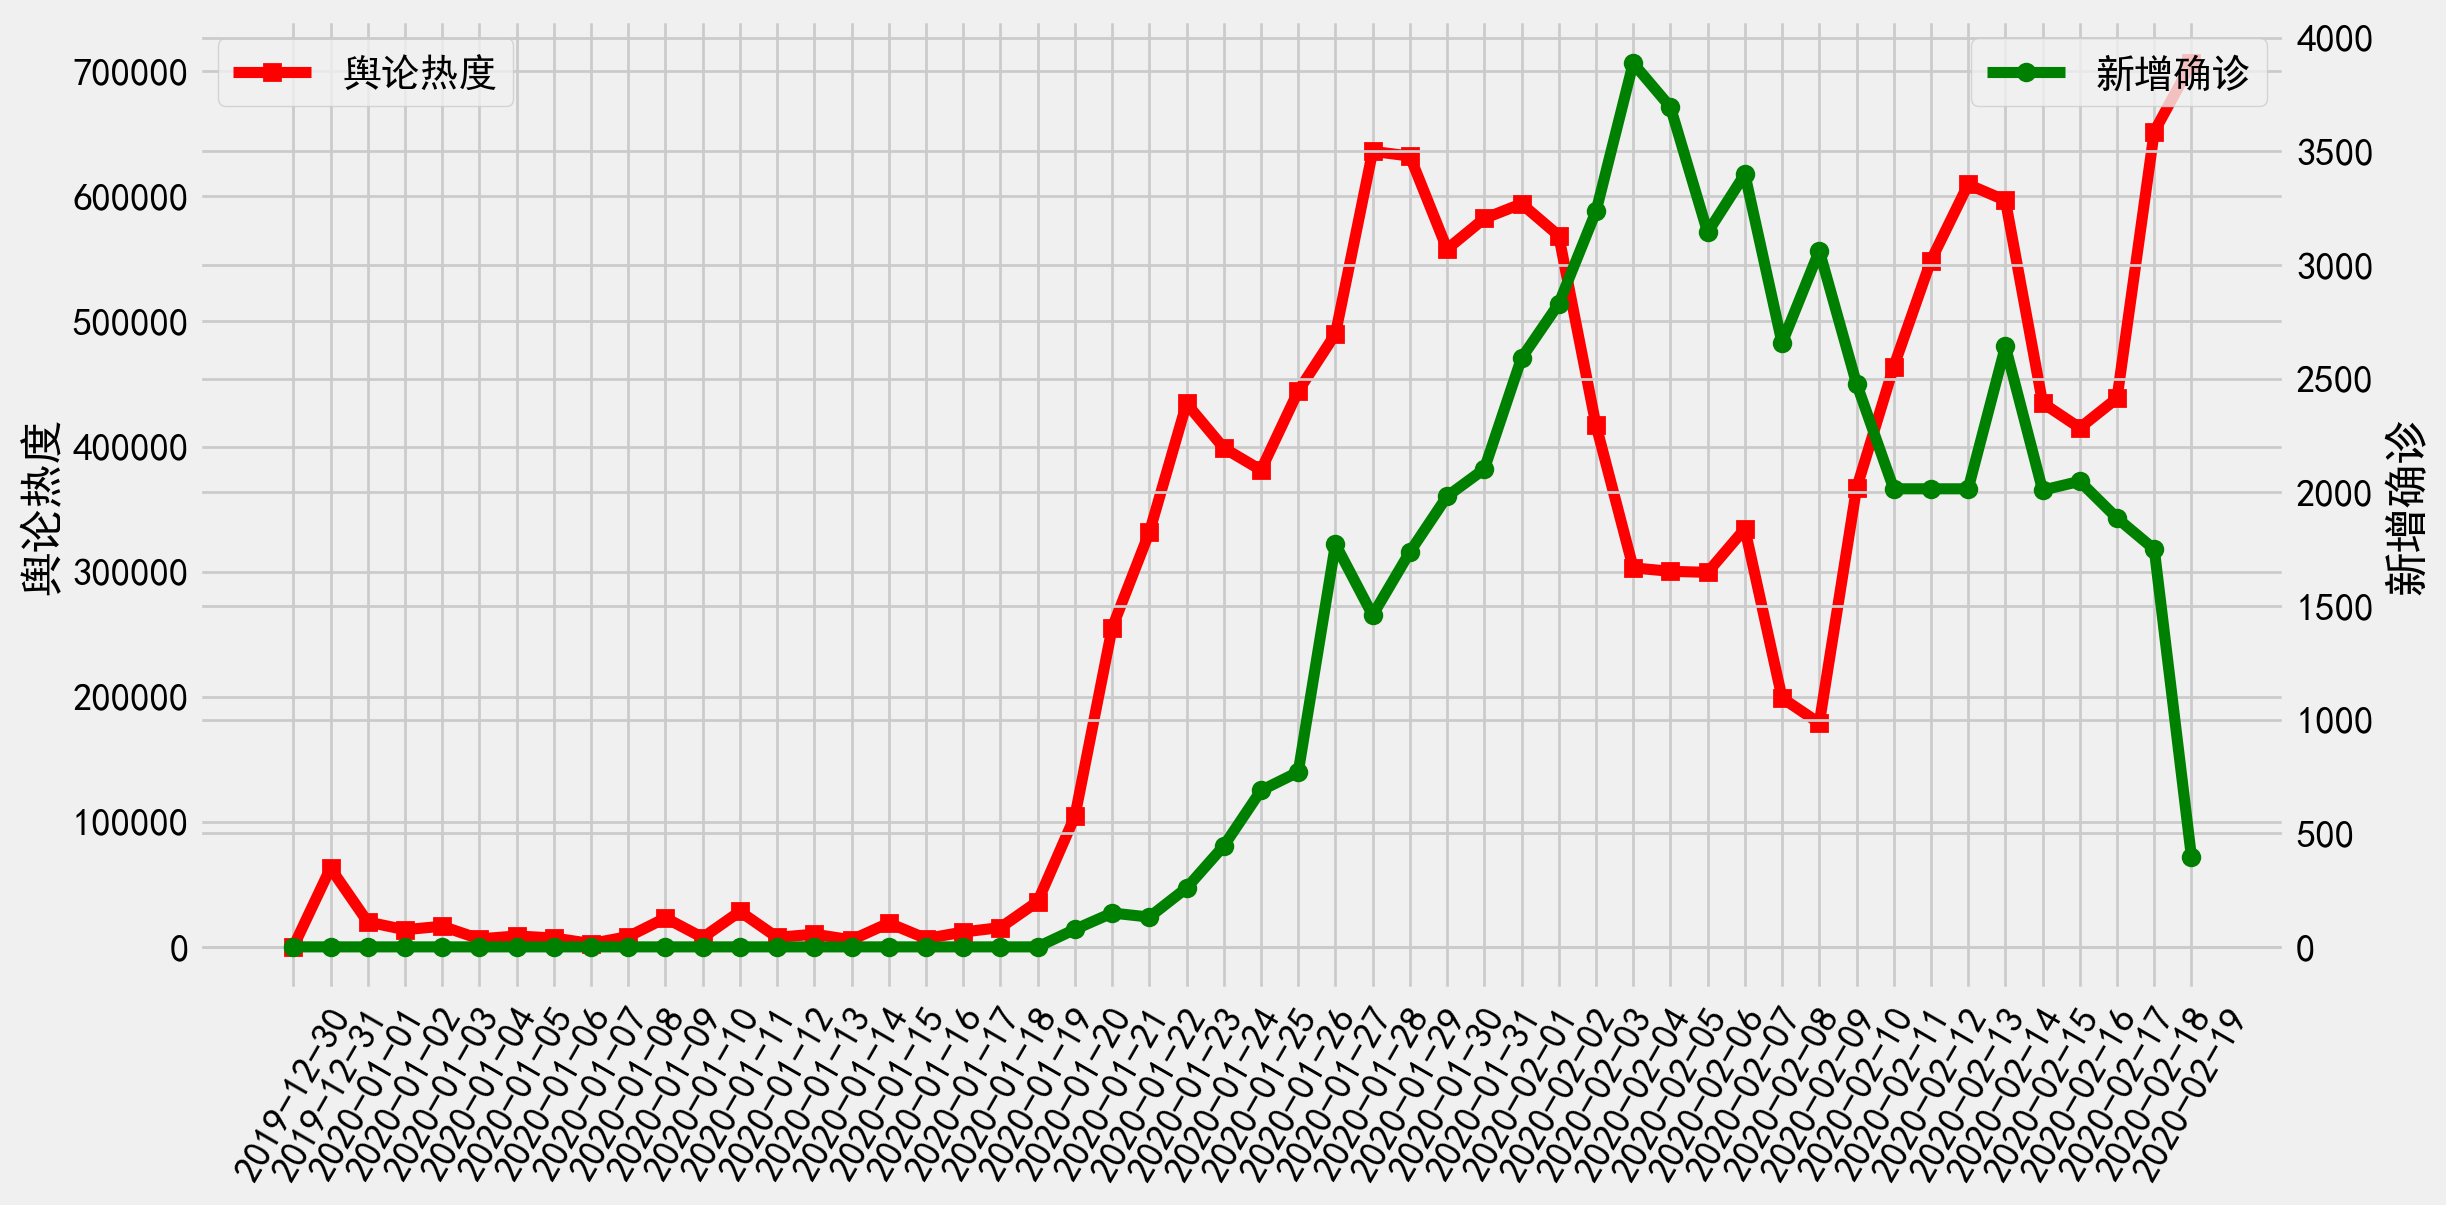

In [111]:
fig = plt.figure(figsize=(12,6),dpi = 200)
plt.style.use('fivethirtyeight')

ax1=fig.add_subplot(111)
ax1.plot(df['time'],  df['heat'], 'r-s')
ax1.set_ylabel('舆论热度', fontsize = 16)
ax1.tick_params(axis='x', rotation=60)
ax1.legend(('舆论热度',),loc='upper left')

ax2=ax1.twinx()
ax2.plot(df['time'], df['case'], 'g-o')
ax2.set_ylabel('新增确诊', fontsize = 16)
ax2.legend(('新增确诊',),loc='upper right')

plt.show()

In [112]:
data = df[21:][['case','heat' ]].pct_change().dropna()

/Users/datalab/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/datalab/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


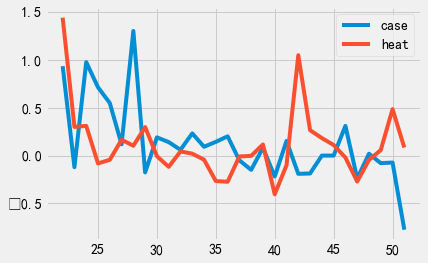

In [113]:
data.plot();

In [114]:
gc_res = grangercausalitytests(data,4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4370  , p=0.5144  , df_denom=26, df_num=1
ssr based chi2 test:   chi2=0.4874  , p=0.4851  , df=1
likelihood ratio test: chi2=0.4834  , p=0.4869  , df=1
parameter F test:         F=0.4370  , p=0.5144  , df_denom=26, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.8949  , p=0.1731  , df_denom=23, df_num=2
ssr based chi2 test:   chi2=4.6137  , p=0.0996  , df=2
likelihood ratio test: chi2=4.2708  , p=0.1182  , df=2
parameter F test:         F=1.8949  , p=0.1731  , df_denom=23, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.9853  , p=0.4196  , df_denom=20, df_num=3
ssr based chi2 test:   chi2=3.9906  , p=0.2625  , df=3
likelihood ratio test: chi2=3.7219  , p=0.2931  , df=3
parameter F test:         F=0.9853  , p=0.4196  , df_denom=20, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.6798  , p=0.0672  , df_d

In [108]:
data = df[21:][['heat','case' ]].pct_change().dropna()
gc_res = grangercausalitytests(data,4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0269  , p=0.8709  , df_denom=26, df_num=1
ssr based chi2 test:   chi2=0.0300  , p=0.8624  , df=1
likelihood ratio test: chi2=0.0300  , p=0.8625  , df=1
parameter F test:         F=0.0269  , p=0.8709  , df_denom=26, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.2822  , p=0.7567  , df_denom=23, df_num=2
ssr based chi2 test:   chi2=0.6870  , p=0.7093  , df=2
likelihood ratio test: chi2=0.6787  , p=0.7122  , df=2
parameter F test:         F=0.2822  , p=0.7567  , df_denom=23, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.4691  , p=0.7071  , df_denom=20, df_num=3
ssr based chi2 test:   chi2=1.9000  , p=0.5934  , df=3
likelihood ratio test: chi2=1.8361  , p=0.6071  , df=3
parameter F test:         F=0.4691  , p=0.7071  , df_denom=20, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.4250  , p=0.7885  , df_d

# test the tails

In [144]:
df = pd.read_excel('zhiwei_line_no_peak.xlsx')
df['heat'] = [float(i) for i in df['heat']]
df['case'] = [int(i) for i in df['case']]
df[40:]

,Unnamed: 0,time,voice,heat,case,allCase
40,40,2020-02-08,NaN,198955.9754,2656,37198
41,41,2020-02-09,NaN,178865.4643,3062,40171
42,42,2020-02-10,NaN,366537.5655,2478,42638
43,43,2020-02-11,NaN,463839.3934,2015,44653
44,44,2020-02-12,NaN,548711.0169,2015,59804
45,45,2020-02-13,NaN,609530.5769,2015,63851
46,46,2020-02-14,NaN,596776.0900,2641,66492
47,47,2020-02-15,NaN,434828.9191,2009,68500
48,48,2020-02-16,NaN,414931.4885,2048,70548
49,49,2020-02-17,NaN,438663.6598,1886,72436


In [147]:
data = df[40:][['heat','case' ]].pct_change().dropna()
gc_res = grangercausalitytests(data,3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0044  , p=0.9492  , df_denom=7, df_num=1
ssr based chi2 test:   chi2=0.0062  , p=0.9372  , df=1
likelihood ratio test: chi2=0.0062  , p=0.9372  , df=1
parameter F test:         F=0.0044  , p=0.9492  , df_denom=7, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.3635  , p=0.3536  , df_denom=4, df_num=2
ssr based chi2 test:   chi2=6.1358  , p=0.0465  , df=2
likelihood ratio test: chi2=4.6785  , p=0.0964  , df=2
parameter F test:         F=1.3635  , p=0.3536  , df_denom=4, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.3789  , p=0.3757  , df_denom=1, df_num=3
ssr based chi2 test:   chi2=81.0940 , p=0.0000  , df=3
likelihood ratio test: chi2=19.2820 , p=0.0002  , df=3
parameter F test:         F=3.3789  , p=0.3757  , df_denom=1, df_num=3


In [148]:
data = df[40:][['case','heat' ]].pct_change().dropna()
gc_res = grangercausalitytests(data,3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.3637  , p=0.2811  , df_denom=7, df_num=1
ssr based chi2 test:   chi2=1.9482  , p=0.1628  , df=1
likelihood ratio test: chi2=1.7799  , p=0.1822  , df=1
parameter F test:         F=1.3637  , p=0.2811  , df_denom=7, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.5310  , p=0.6244  , df_denom=4, df_num=2
ssr based chi2 test:   chi2=2.3894  , p=0.3028  , df=2
likelihood ratio test: chi2=2.1191  , p=0.3466  , df=2
parameter F test:         F=0.5310  , p=0.6244  , df_denom=4, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.0444  , p=0.6000  , df_denom=1, df_num=3
ssr based chi2 test:   chi2=25.0665 , p=0.0000  , df=3
likelihood ratio test: chi2=11.3526 , p=0.0100  , df=3
parameter F test:         F=1.0444  , p=0.6000  , df_denom=1, df_num=3


# spurous correlation

http://www.tylervigen.com/spurious-correlations

In [132]:
import numpy as np
suicide = [5427,5688,6198,6462,6635,7336,7248,7491,8161,8578,9000]
spending = [18.079,18.594,19.753,20.734,20.831,23.029,23.597,23.584,25.525,27.731,29.449]
d = np.array([suicide, spending])

In [133]:
df = pd.DataFrame(d.T, columns = ['suicide', 'spending']) # .pct_change().dropna()

In [135]:
data = df[['suicide','spending' ]].pct_change().dropna()
gc_res = grangercausalitytests(data,2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.6049  , p=0.0330  , df_denom=6, df_num=1
ssr based chi2 test:   chi2=11.4073 , p=0.0007  , df=1
likelihood ratio test: chi2=7.3680  , p=0.0066  , df=1
parameter F test:         F=7.6049  , p=0.0330  , df_denom=6, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.5180  , p=0.6408  , df_denom=3, df_num=2
ssr based chi2 test:   chi2=2.7627  , p=0.2512  , df=2
likelihood ratio test: chi2=2.3731  , p=0.3053  , df=2
parameter F test:         F=0.5180  , p=0.6408  , df_denom=3, df_num=2


In [136]:
data = df[['spending', 'suicide' ]].pct_change().dropna()
gc_res = grangercausalitytests(data,2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.5229  , p=0.1633  , df_denom=6, df_num=1
ssr based chi2 test:   chi2=3.7844  , p=0.0517  , df=1
likelihood ratio test: chi2=3.1590  , p=0.0755  , df=1
parameter F test:         F=2.5229  , p=0.1633  , df_denom=6, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1465  , p=0.8695  , df_denom=3, df_num=2
ssr based chi2 test:   chi2=0.7814  , p=0.6766  , df=2
likelihood ratio test: chi2=0.7455  , p=0.6888  , df=2
parameter F test:         F=0.1465  , p=0.8695  , df_denom=3, df_num=2
